In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
df1 = pd.read_csv("Concrete_Data.csv")

df1

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
df1 = df1.rename(columns = {'cement' : 'cement',
                                 'blast_furnace_slag' : 'slag',
                                 'fly_ash' : 'ash',
                                 'water' : 'water',
                                 'superplasticizer' : 'superplastic',
                                 'coarse_aggregate' : 'coarse',
                                 'fine_aggregate ' : 'fine',
                                 'age' : 'age',
                                 'concrete_compressive_strength' : 'strength'})

In [5]:
df1.head()

,cement,slag,ash,water,superplastic,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df1.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarse          0
fine            0
age             0
strength        0
dtype: int64

In [7]:
print('Number of outliers in cement: ', df1[((df1.cement - df1.cement.mean()) / df1.cement.std()).abs() > 3]['cement'].count())
print('Number of outliers in slag: ', df1[((df1.slag - df1.slag.mean()) / df1.slag.std()).abs() > 3]['slag'].count())
print('Number of outliers in ash: ', df1[((df1.ash - df1.ash.mean()) / df1.ash.std()).abs() > 3]['ash'].count())
print('Number of outliers in water: ', df1[((df1.water - df1.water.mean()) / df1.water.std()).abs() > 3]['water'].count())
print('Number of outliers in superplastic: ', df1[((df1.superplastic - df1.superplastic.mean()) / df1.superplastic.std()).abs() > 3]['superplastic'].count())
print('Number of outliers in coarse: ', df1[((df1.coarse - df1.coarse.mean()) / df1.coarse.std()).abs() > 3]['coarse'].count())
print('Number of outliers in fine: ', df1[((df1.fine - df1.fine.mean()) / df1.fine.std()).abs() > 3]['fine'].count())
print('Number of outliers in age: ', df1[((df1.age - df1.age.mean()) / df1.age.std()).abs() > 3]['age'].count())


Number of outliers in cement:  0
Number of outliers in slag:  4
Number of outliers in ash:  0
Number of outliers in water:  2
Number of outliers in superplastic:  10
Number of outliers in coarse:  0
Number of outliers in fine:  0
Number of outliers in age:  33


<AxesSubplot:>

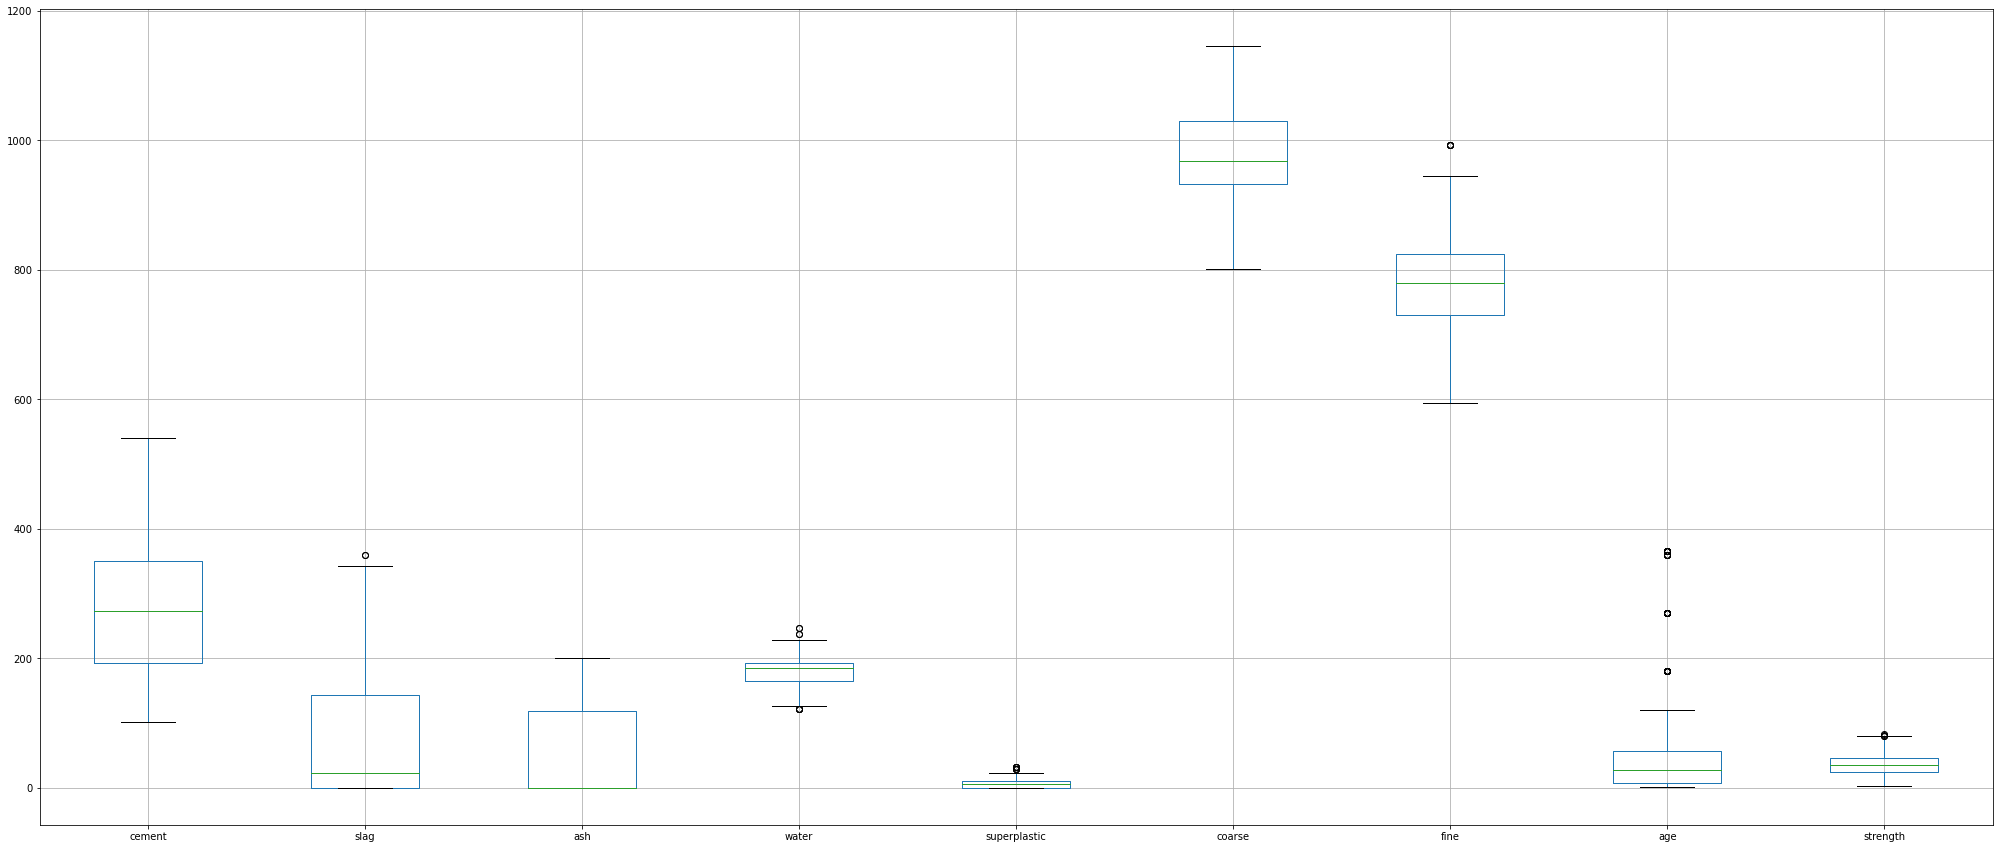

In [8]:
df1.boxplot(figsize=(35,15))

In [9]:
for col_name in df1.columns[:-1]:
    q1 = df1[col_name].quantile(0.25)
    q3 = df1[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    df1.loc[(df1[col_name] < low) | (df1[col_name] > high), col_name] = df1[col_name].median()

<AxesSubplot:>

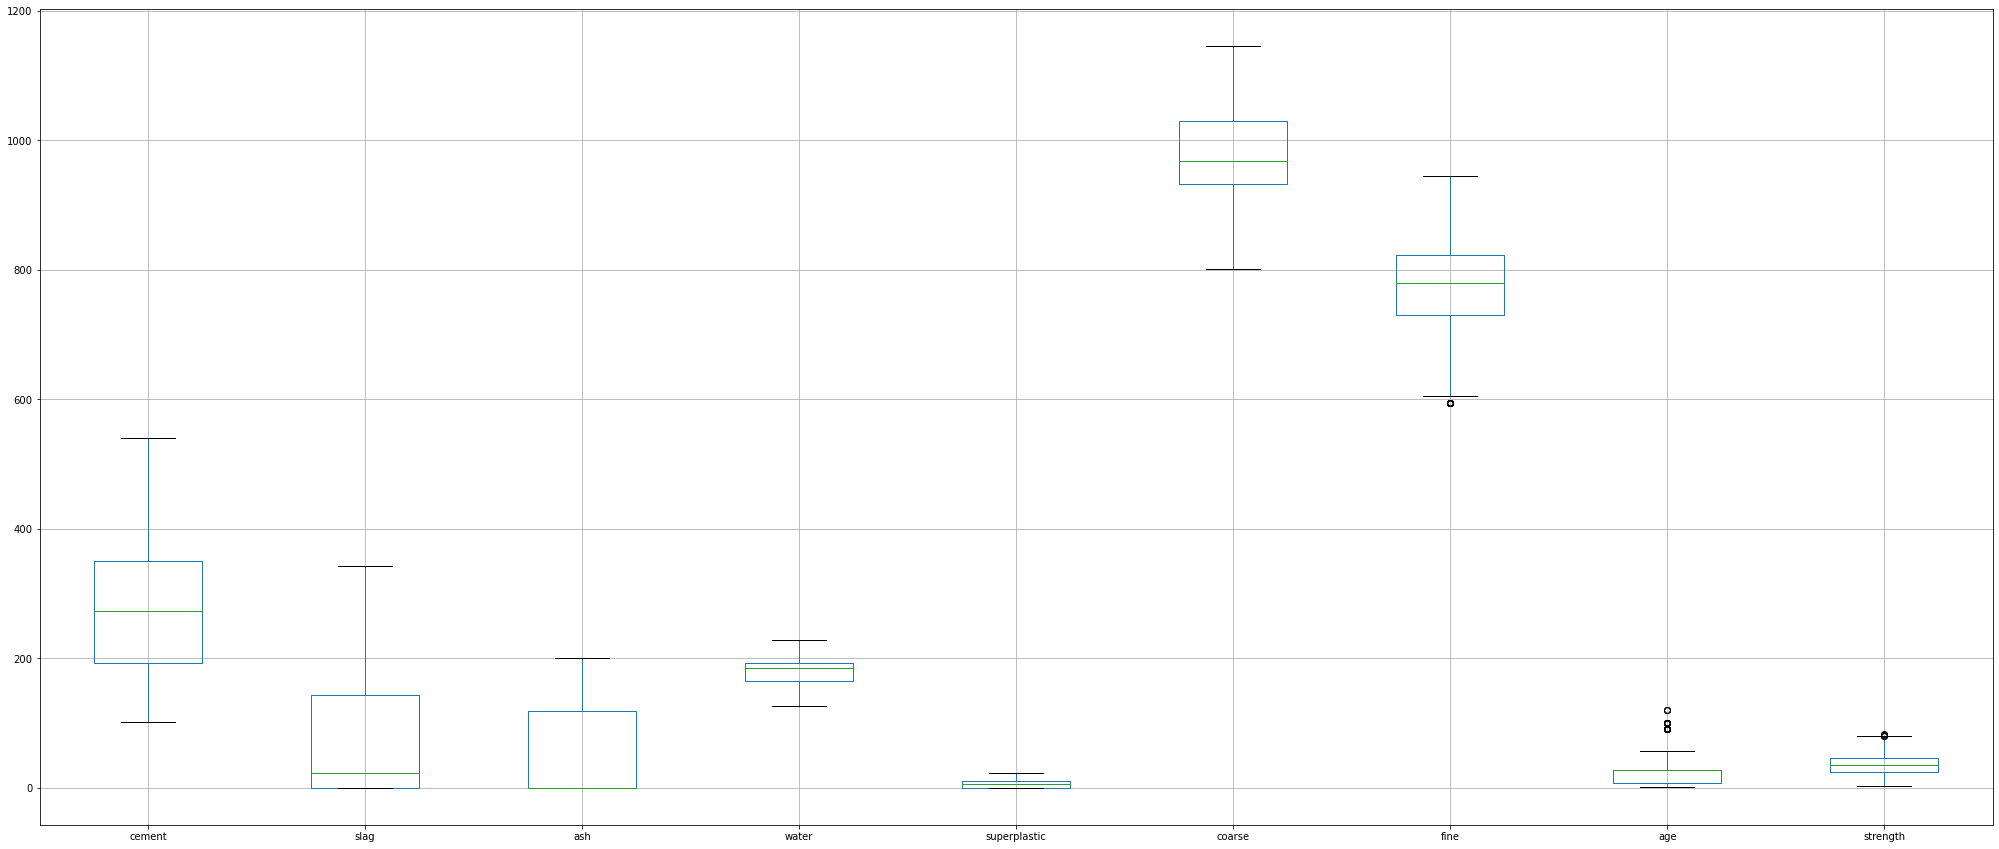

In [10]:
df1.boxplot(figsize=(35,15))

<AxesSubplot:xlabel='strength', ylabel='Density'>

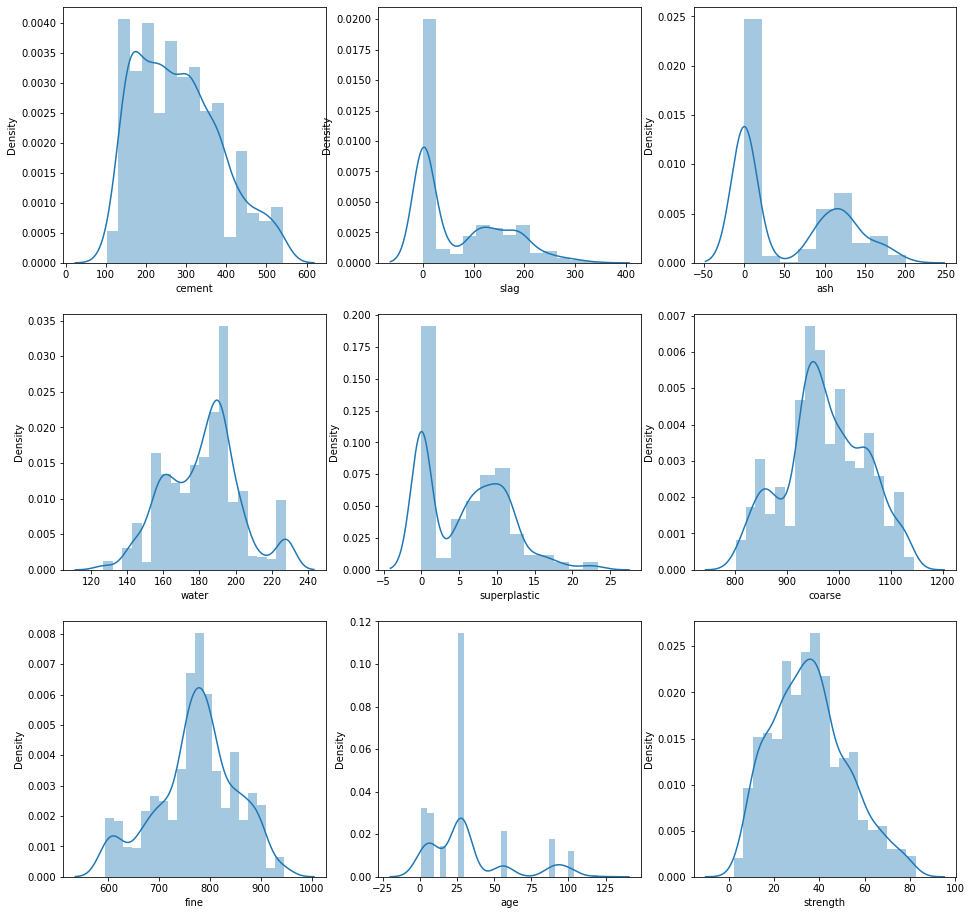

In [11]:
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(df1['cement'],ax=ax2[0][0])
sns.distplot(df1['slag'],ax=ax2[0][1])
sns.distplot(df1['ash'],ax=ax2[0][2])
sns.distplot(df1['water'],ax=ax2[1][0])
sns.distplot(df1['superplastic'],ax=ax2[1][1])
sns.distplot(df1['coarse'],ax=ax2[1][2])
sns.distplot(df1['fine'],ax=ax2[2][0])
sns.distplot(df1['age'],ax=ax2[2][1])
sns.distplot(df1['strength'],ax=ax2[2][2])

In [12]:
df1['Cement_to_Water_Ratio'] = df1['cement'] / df1['water']
df1['Aggregate_to_Binder_Ratio'] = (df1['coarse'] + df1['fine']) / (df1['cement'] + df1['slag'] + df1['ash'])
df1['Age_times_Cement'] = df1['age'] * df1['cement']
df1['Age_squared'] = df1['age'] ** 2
df1['Total_Binder'] = df1['cement'] + df1['slag'] + df1['ash']
df1['Total_Aggregate'] = df1['coarse'] + df1['fine']
df1['Cement_times_Superplasticizer'] = df1['cement'] * df1['superplastic']
df1['Water_times_Superplasticizer'] = df1['water'] * df1['superplastic']

In [13]:
df1

,cement,slag,ash,water,superplastic,coarse,fine,age,strength,Cement_to_Water_Ratio,Aggregate_to_Binder_Ratio,Age_times_Cement,Age_squared,Total_Binder,Total_Aggregate,Cement_times_Superplasticizer,Water_times_Superplasticizer
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,3.333333,3.177778,15120.0,784,540.0,1716.0,1350.00,405.00
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,3.333333,3.205556,15120.0,784,540.0,1731.0,1350.00,405.00
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.27,1.458333,3.212632,9310.0,784,475.0,1526.0,0.00,0.00
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.05,1.458333,3.212632,9310.0,784,475.0,1526.0,0.00,0.00
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.30,1.034375,5.449849,5560.8,784,331.0,1803.9,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,1.538976,3.394241,7739.2,784,482.7,1638.4,2459.96,1598.44
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,1.643878,3.726131,9021.6,784,437.8,1631.3,3350.88,2038.40
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,0.770628,4.217907,4158.0,784,396.5,1672.4,905.85,1175.47
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,0.906036,5.143146,4454.8,784,345.8,1778.5,1797.83,1984.28


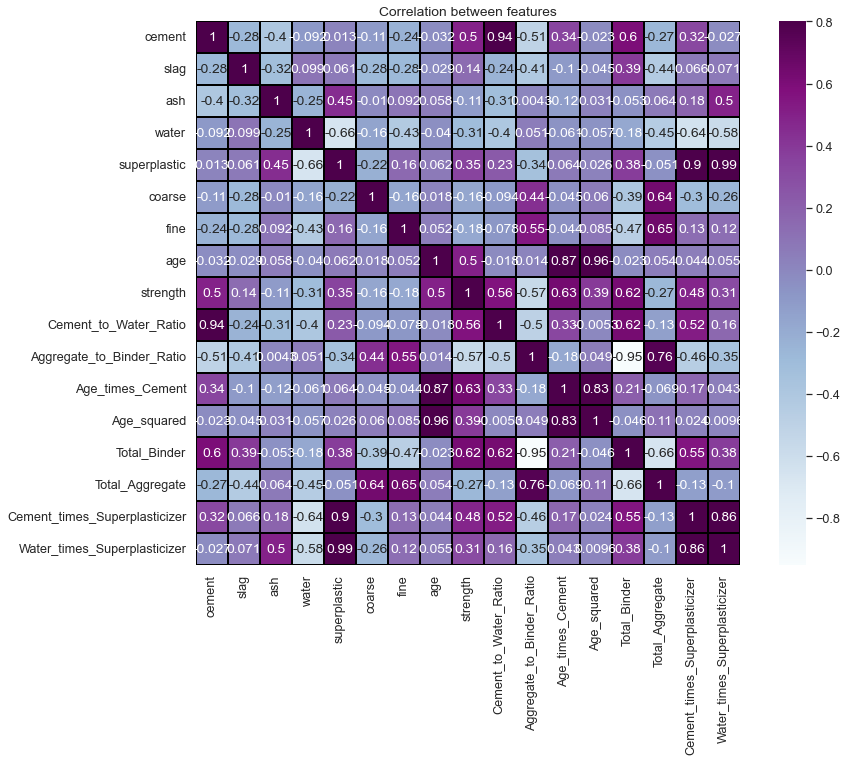

In [14]:
cor = df1.corr()
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(cor, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap="BuPu",linecolor="black")
plt.title('Correlation between features');

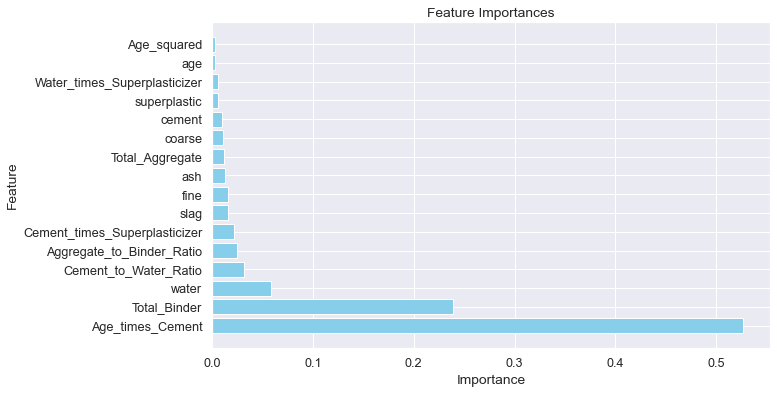

                          Feature  Importance
10               Age_times_Cement    0.526846
12                   Total_Binder    0.239275
3                           water    0.058364
8           Cement_to_Water_Ratio    0.032135
9       Aggregate_to_Binder_Ratio    0.025041
14  Cement_times_Superplasticizer    0.022223
1                            slag    0.016102
6                            fine    0.015470
2                             ash    0.012450
13                Total_Aggregate    0.012182
5                          coarse    0.010867
0                          cement    0.010342
4                    superplastic    0.006410
15   Water_times_Superplasticizer    0.006394
7                             age    0.003332
11                    Age_squared    0.002568


In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


X = df1[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarse', 'fine',
        'age', 'Cement_to_Water_Ratio', 'Aggregate_to_Binder_Ratio',
        'Age_times_Cement', 'Age_squared', 'Total_Binder', 'Total_Aggregate',
        'Cement_times_Superplasticizer', 'Water_times_Superplasticizer']]
y = df1['strength']

# Train 
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# feature importances
feature_importances = rf_model.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot 
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# Print imoprtance
print(importance_df)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Perform GridSearchCV
grid_search.fit(X, y)

# Get the best estimator and best parameters
best_rf_model = grid_search.best_estimator_
best_parameters = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_parameters)

# Make predictions using the best model
y_pred_best = best_rf_model.predict(X_test)

# Calculate Mean Squared Error (MSE) on the test set
mse_best = mean_squared_error(y_test, y_pred_best)

from sklearn import metrics

# Print best hyperparameters
print('Best hyperparameters:', best_parameters)

# Performance on testing data with tuned Random Forest Regressor
performance_test = best_rf_model.score(X_test, y_test)
print('Performance on testing data with tuned Random Forest Regressor:', performance_test)

# Calculate R-squared (coefficient of determination) on testing data
r2_score_test = metrics.r2_score(y_test, y_pred_best)
print('R-squared (tuned):', r2_score_test)

# Calculate Mean Squared Error (MSE) on testing data
mse_test = metrics.mean_squared_error(y_test, y_pred_best)
print('MSE on testing data (tuned):', mse_test)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Performance on testing data with tuned Random Forest Regressor: 0.9781904572590755
R-squared (tuned): 0.9781904572590755
MSE on testing data (tuned): 5.619815240964566


In [18]:
import numpy as np

def expand_features(sample):
    # Extract individual features from the input array
    cement, slag, ash, water, superplastic, coarse, fine, age = sample
    
    # Additional derived features
    cement_to_water_ratio = cement / water
    aggregate_to_binder_ratio = (coarse + fine) / (cement + slag + ash)
    age_times_cement = age * cement
    age_squared = age ** 2
    total_binder = cement + slag + ash
    total_aggregate = coarse + fine
    cement_times_superplasticizer = cement * superplastic
    water_times_superplasticizer = water * superplastic
    
    # Create the expanded feature array
    expanded_sample = np.array([
        cement, slag, ash, water, superplastic, coarse, fine, age,
        cement_to_water_ratio, aggregate_to_binder_ratio, age_times_cement,
        age_squared, total_binder, total_aggregate,
        cement_times_superplasticizer, water_times_superplasticizer
    ])
    
    return expanded_sample

# Example usage:
sample_8_features = np.array([276.4, 116, 90.3, 179.6, 8.9, 870.1, 768.3, 28])
expanded_sample = expand_features(sample_8_features)
print("Expanded features:", expanded_sample)


Expanded features: [2.76400000e+02 1.16000000e+02 9.03000000e+01 1.79600000e+02
 8.90000000e+00 8.70100000e+02 7.68300000e+02 2.80000000e+01
 1.53897550e+00 3.39424073e+00 7.73920000e+03 7.84000000e+02
 4.82700000e+02 1.63840000e+03 2.45996000e+03 1.59844000e+03]


In [19]:
prediction = best_rf_model.predict(expanded_sample.reshape(1, -1))
print("Predicted compressive strength:", prediction)

Predicted compressive strength: [43.673288]


In [20]:
import joblib

In [21]:
joblib.dump(best_rf_model, 'best_rf_model.pkl')

['best_rf_model.pkl']

In [22]:
sample_8_features = np.array([0, 0, 0, 0, 0, 0, 0, 0])
expanded_sample = expand_features(sample_8_features)
print("Expanded features:", expanded_sample)


Expanded features: [ 0.  0.  0.  0.  0.  0.  0.  0. nan nan  0.  0.  0.  0.  0.  0.]
